# Assignment 1 B:

### Import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Layer class

In [2]:
class Layer:
    def __init__(self, neurons_size: int, inputs_size: int, activation: str = 'sigmoid', leaky_slope: float = 0.01, softmax_dim: int = 0):
        '''
        Initialize the layer with random weights and biases

        Parameters:
            neurons_size: int
                The number of neurons in the layer
            inputs_size: int
                The number of inputs to the layer
            activation: str
                The activation function to use
            leaky_slope: float
                The slope of the leaky relu activation function
            softmax_dim: int
                The dimension of the softmax activation function
        '''

        # initialize weights and biases with random values
        # use the ha initialization method to initialize the weights if the activation function is relu or leaky relu else use the xavier initialization method
        if activation == 'relu' or activation == 'leaky_relu':
            self._weights: list[float] = np.random.randn(
                neurons_size, inputs_size) * np.sqrt(2 / inputs_size)
        else:
            self._weights: list[float] = np.random.randn(
                neurons_size, inputs_size) * np.sqrt(1 / inputs_size)

        self._biases: list[float] = np.zeros(neurons_size)
        self._activation: str = activation
        self._leaky_slope: float = leaky_slope
        self._softmax_dim: int = softmax_dim

        self._activation_function: dict[str, callable] = {
            'sigmoid': lambda sum: 1.0 / (1.0 + np.exp(-sum)),
            'tanh': lambda sum: np.tanh(sum),
            'relu': lambda sum: np.maximum(0, sum),
            'leaky_relu': lambda sum: np.maximum(self._leaky_slope * sum, sum),
            'softmax': lambda sum: np.exp(sum) / np.sum(np.exp(sum), axis=self._softmax_dim, keepdims=True)
        }

    def forward(self, inputs: np.ndarray) -> np.ndarray:
        '''
        Forward pass

        Parameters:
            inputs: np.ndarray
                The inputs to the layer
        Returns:
            np.ndarray
                The outputs of the layer
        '''
        # calculate the sum of the inputs multiplied by the weights and add the biases
        sum: np.ndarray = np.dot(self._weights, inputs) + self._biases

        if self._activation in self._activation_function:
            return self._activation_function[self._activation](sum)
        else:
            raise ValueError(
                f"Activation function {self._activation} not found")

### Graph Visualization function for testing

In [3]:
def compare_activation_functions():
    """
    Compare different activation functions over a range of input values
    """
    # Create a range of input values
    x = np.linspace(-10, 10, 1000)
    
    # Set up the figure
    plt.figure(figsize=(14, 8))
    
    # Create 1x1 dummy layer for each activation function
    sigmoid_layer = Layer(1, 1, activation='sigmoid')
    tanh_layer = Layer(1, 1, activation='tanh')
    relu_layer = Layer(1, 1, activation='relu')
    leaky_relu_layer = Layer(1, 1, activation='leaky_relu', leaky_slope=0.1)
    
    # Force weights to 1 and biases to 0 for visualization
    sigmoid_layer._weights = np.array([[1.0]])
    sigmoid_layer._biases = np.array([0.0])
    
    tanh_layer._weights = np.array([[1.0]])
    tanh_layer._biases = np.array([0.0])
    
    relu_layer._weights = np.array([[1.0]])
    relu_layer._biases = np.array([0.0])
    
    leaky_relu_layer._weights = np.array([[1.0]])
    leaky_relu_layer._biases = np.array([0.0])
    
    # Calculate outputs for each activation function
    sigmoid_outputs = np.array([sigmoid_layer.forward(np.array([val]))[0] for val in x])
    tanh_outputs = np.array([tanh_layer.forward(np.array([val]))[0] for val in x])
    relu_outputs = np.array([relu_layer.forward(np.array([val]))[0] for val in x])
    leaky_relu_outputs = np.array([leaky_relu_layer.forward(np.array([val]))[0] for val in x])
    
    # Plot the activation functions
    plt.plot(x, sigmoid_outputs, 'r-', label='Sigmoid', linewidth=2)
    plt.plot(x, tanh_outputs, 'g-', label='Tanh', linewidth=2)
    plt.plot(x, relu_outputs, 'b-', label='ReLU', linewidth=2)
    plt.plot(x, leaky_relu_outputs, 'm-', label='Leaky ReLU (α=0.1)', linewidth=2)
    
    # Add grid, legend, and labels
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.xlabel('Input', fontsize=14)
    plt.ylabel('Output', fontsize=14)
    plt.title("Activation Functions Comparison", fontsize=16)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

### Normal testing function

In [4]:
def run_original_tests():
    test_inputs = np.array([2.0, -3.0, 5.0])
    
    # Test the layer with different activation functions
    print("Testing different activation functions:")
    for activation in ['sigmoid', 'tanh', 'relu', 'leaky_relu', 'softmax']:
        layer = Layer(5, 3, activation=activation)
        print(f'{activation.capitalize()} activation: {layer.forward(test_inputs)}')
    print('')
    
    # Test the layer with different leaky slopes
    print("Testing leaky ReLU with different slopes:")
    for leaky_slope in [0.01, 0.1, 1.0]:
        layer = Layer(5, 3, activation='leaky_relu', leaky_slope=leaky_slope)
        print(f'Leaky ReLU with slope {leaky_slope}: {layer.forward(test_inputs)}')
    print('')
    
    # Test the layer with a batch of inputs
    print("Testing softmax activation with batch inputs:")
    np.random.seed(42)  # For reproducibility
    batch_inputs = np.random.randn(4, 3)
    layer = Layer(5, 3, activation='softmax', softmax_dim=0)
    for i, sample in enumerate(batch_inputs):
        print(f'Sample {i+1}: {sample}')
        print(f'Output {i+1}: {layer.forward(sample)}')
    print('')

### Test the layer

Testing different activation functions:
Sigmoid activation: [0.00298058 0.8448182  0.15853669 0.46030981 0.09870581]
Tanh activation: [-0.3551223  -0.0086502   0.95138978  0.99999192  0.09762055]
Relu activation: [5.94259613 0.         8.48812399 0.         3.9617735 ]
Leaky_relu activation: [9.55000978 1.31016176 7.65392086 7.45821782 2.51112859]
Softmax activation: [2.81632132e-01 9.58319409e-04 6.67738416e-01 4.96497198e-02
 2.14135076e-05]

Testing leaky ReLU with different slopes:
Leaky ReLU with slope 0.01: [-0.06213958  4.7161398   0.48183234 -0.04670191 10.28063983]
Leaky ReLU with slope 0.1: [ 1.46500304 -0.288209   -1.53616468  9.47340345 -0.34800036]
Leaky ReLU with slope 1.0: [ 5.89881435  3.56146074  4.61450708  4.1748843  -8.87714779]

Testing softmax activation with batch inputs:
Sample 1: [ 0.49671415 -0.1382643   0.64768854]
Output 1: [0.15292972 0.24225455 0.34837752 0.12773602 0.12870219]
Sample 2: [ 1.52302986 -0.23415337 -0.23413696]
Output 2: [0.4181232  0.1385455

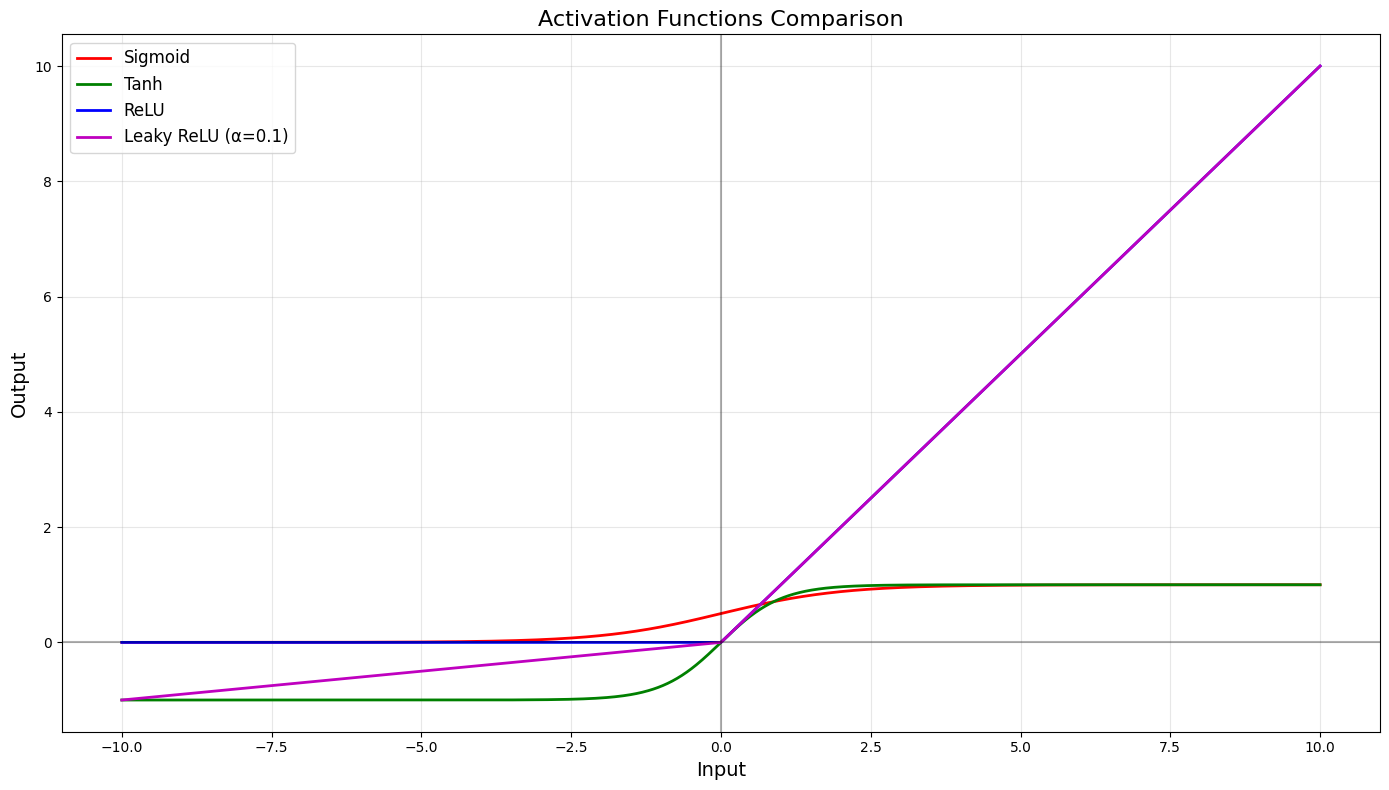

In [5]:
run_original_tests()
compare_activation_functions()